In [ ]:
!pip install geopandas

In [ ]:
import geoviews as gv
from geoviews import dim
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh')

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
# import contextily as ctx
# import requests
# import tempfile
# import zipfile
import seaborn as sns
import plotly.express as px
import numpy as np
from IPython.core.display import display, HTML

## 1) Chargement des données (Récup_données) et téléchargement de la localisation des départements français (restreint au champ métropolitain puis champ Ile de France)

In [ ]:
%store -r donnees_2018_hab
donnees_2018_hab

In [ ]:
url_dep = 'https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb'
departements = gpd.read_file(url_dep)
departements = departements.set_index("code")
departements.drop(['nom'], axis=1, inplace = True)
departements


In [ ]:
#Restriction au champ IDF pour une sous-carte
departements_idf = departements.loc[departements.index.isin(['75','77','78','91','92','93','94','95'])]
departements_idf

## 2) Sélection des items que l'on souhaite représenter (au champ métropolitain puis IDF) 

In [ ]:
donnees_2018_hab.index.names = ['CODDEP']
donnees_2018_hab.describe()

In [ ]:
donnees_2018_hab_pauvrete = donnees_2018_hab.drop(['REG','MED18','D118','D918','RD18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_pauvrete

In [ ]:
donnees_2018_hab_rev_median = donnees_2018_hab.drop(['REG','TP6018','D118','D918','RD18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_rev_median

In [ ]:
donnees_2018_hab_ratio_d1_d9 = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','T1_2018','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_ratio_d1_d9

In [ ]:
donnees_2018_hab_chomage = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','RD18','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','Nb_Boucherie_dep_hab','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_chomage

In [ ]:
donnees_2018_hab_boucherie = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','RD18','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','T1_2018','Crim_Del_GN_hab','Crim_Del_PN_hab','Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_boucherie

In [ ]:
donnees_2018_hab_nb_pn_gn = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','RD18','Nb_Boucherie_dep_hab','Crim_Del_PN_GN','T1_2018','Crim_Del_GN_hab','Crim_Del_PN_hab','Nb_Boucherie_dep_hab', 'Crim_Del_PN_GN_hab'], axis=1)
donnees_2018_hab_nb_pn_gn

In [ ]:
donnees_2018_hab_nb_crimes_delits = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','RD18','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','T1_2018','Crim_Del_GN_hab','Crim_Del_PN_hab','Nb_Boucherie_dep_hab'], axis=1)
donnees_2018_hab_nb_crimes_delits

In [ ]:
donnees_2018_hab_crimes_delits = donnees_2018_hab.drop(['REG','TP6018','D118','D918','MED18','RD18','Nb_PN_GN_dep_100k_hab','Crim_Del_PN_GN','T1_2018','Crim_Del_GN_hab','Crim_Del_PN_hab','Nb_Boucherie_dep_hab'], axis=1)
donnees_2018_hab_crimes_delits

In [ ]:
carto_pauvrete=departements.merge(donnees_2018_hab_pauvrete,left_index=True,right_index=True)
carto_pauvrete

In [ ]:
carto_rev_median=departements.merge(donnees_2018_hab_rev_median,left_index=True,right_index=True)
carto_rev_median

In [ ]:
carto_ratio_d1_d9=departements.merge(donnees_2018_hab_ratio_d1_d9,left_index=True,right_index=True)
carto_ratio_d1_d9

In [ ]:
carto_chomage=departements.merge(donnees_2018_hab_chomage,left_index=True,right_index=True)
carto_chomage

In [ ]:
carto_boucherie=departements.merge(donnees_2018_hab_boucherie,left_index=True,right_index=True)
carto_ratio_d1_d9

In [ ]:
carto_nb_pn_gn=departements.merge(donnees_2018_hab_nb_pn_gn,left_index=True,right_index=True)
carto_nb_pn_gn

In [ ]:
carto_crimes_delits=departements.merge(donnees_2018_hab_crimes_delits,left_index=True,right_index=True)
carto_crimes_delits

In [ ]:
#Restriction au champ IDF pour une sous-carte
carto_pauvrete_idf = carto_pauvrete.loc[carto_pauvrete.index.isin(['75','77','78','91','92','93','94','95'])]
carto_pauvrete_idf

In [ ]:
carto_rev_median_idf = carto_rev_median.loc[carto_rev_median.index.isin(['75','77','78','91','92','93','94','95'])]
carto_rev_median_idf

In [ ]:
carto_ratio_d1_d9_idf = carto_ratio_d1_d9.loc[carto_ratio_d1_d9.index.isin(['75','77','78','91','92','93','94','95'])]
carto_ratio_d1_d9_idf

In [ ]:
carto_chomage_idf = carto_chomage.loc[carto_chomage.index.isin(['75','77','78','91','92','93','94','95'])]
carto_chomage_idf

In [ ]:
carto_boucherie_idf = carto_boucherie.loc[carto_boucherie.index.isin(['75','77','78','91','92','93','94','95'])]
carto_boucherie_idf

In [ ]:
carto_nb_pn_gn_idf = carto_nb_pn_gn.loc[carto_nb_pn_gn.index.isin(['75','77','78','91','92','93','94','95'])]
carto_nb_pn_gn_idf

In [ ]:
carto_crimes_delits_idf = carto_crimes_delits.loc[carto_crimes_delits.index.isin(['75','77','78','91','92','93','94','95'])]
carto_crimes_delits_idf

## 3) Représentation cartographique cloropèthe (au champ France Métropolitaine puis champ Ile de France) 

* Taux de pauvreté monétaire

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_pauvrete.plot(column='TP6018', 
                    cmap='Purples', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:

fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_pauvrete_idf.plot(column='TP6018', 
                    cmap='Purples', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)', 'orientation': "horizontal"})
ax.set_axis_off()

* Niveau de vie médian

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_rev_median.plot(column='MED18', 
                    cmap='Oranges', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Niveau de vie médian (en euros)', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_rev_median_idf.plot(column='MED18', 
                    cmap='Oranges', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Niveau de vie médian (en euros)', 'orientation': "horizontal"})
ax.set_axis_off()

* Ratio inter-décile de niveau de vie 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_ratio_d1_d9.plot(column='RD18', 
                    cmap='RdPu', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Ratio inter-décile de niveau de vie', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_ratio_d1_d9_idf.plot(column='RD18', 
                    cmap='RdPu', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Ratio inter-décile de niveau de vie', 'orientation': "horizontal"})
ax.set_axis_off()

* Taux de chômage localisé

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_chomage.plot(column='T1_2018', 
                    cmap='Greens', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de chômage localisé (en pourcentage)', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_chomage_idf.plot(column='T1_2018', 
                    cmap='Greens', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Taux de chômage localisé (en pourcentage)', 'orientation': "horizontal"})
ax.set_axis_off()

* Nombre de boucheries pour 100k habitants

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_boucherie.plot(column='Nb_Boucherie_dep_hab', 
                    cmap='Reds', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de boucheries-charcuteries pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_boucherie_idf.plot(column='Nb_Boucherie_dep_hab', 
                    cmap='Reds', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de boucheries-charcuteries pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

* Nombre de policiers et gendarmes (2019) pour 100k habitants

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_nb_pn_gn.plot(column='Nb_PN_GN_dep_100k_hab', 
                    cmap='YlOrBr', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de policiers et gendarmes (2019) pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_nb_pn_gn_idf.plot(column='Nb_PN_GN_dep_100k_hab', 
                    cmap='YlOrBr', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de policiers et gendarmes (2019) pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

* Nombre de crimes et délits répertoriés pour 100k habitants

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements.plot(color='gray', ax=ax)
carto_crimes_delits.plot(column='Crim_Del_PN_GN_hab', 
                    cmap='YlGnBu', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de crimes et délits répertoriés pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

departements_idf.plot(color='gray', ax=ax)
carto_crimes_delits_idf.plot(column='Crim_Del_PN_GN_hab', 
                    cmap='YlGnBu', 
                    linewidth=0.5, 
                    edgecolor='black',
                    ax=ax, 
                    legend=True,
                    legend_kwds={'label': 'Nombre de crimes et délits répertoriés pour 100 000 habitants', 'orientation': "horizontal"})
ax.set_axis_off()

In [ ]:
# 4) Analyse univariée 

In [ ]:
donnees_2018_hab.info()

donnees_2018_hab_mini=donnees_2018_hab.drop(["D918","D118","REG","Crim_Del_GN_hab","Crim_Del_PN_hab","Crim_Del_PN_GN"],axis=1)

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(donnees_2018_hab_mini.corr(), dtype=np.bool))
heatmap = sns.heatmap(donnees_2018_hab_mini.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
donnees_2018_hab_mini.reset_index()
fig = px.box(donnees_2018_hab_mini, y="TP6018",hover_data=[ 'Libellé'], labels=dict(TP6018 = 'Taux de pauvreté monétaire au seuil de 60%'))

fig.write_html('figure_TP6018.html', auto_open=True)
display(HTML("figure_TP6018.html"))

In [ ]:
fig2 = px.box(donnees_2018_hab_mini, y="MED18",hover_data=[ 'Libellé'],labels=dict(MED18 = 'Niveau de vie médian'))

fig2.write_html('figure_MED18.html', auto_open=True)
display(HTML("figure_MED18.html"))

In [ ]:
fig3= px.box(donnees_2018_hab_mini, y="RD18",hover_data=[ 'Libellé'], labels=dict(RD18 = 'Ratio inter-décile'))

fig3.write_html('figure_RD_2018.html', auto_open=True)
display(HTML("figure_RD_2018.html"))

In [ ]:
fig4 = px.box(donnees_2018_hab_mini, y="T1_2018",hover_data=[ 'Libellé'], labels=dict(T1_2018 = 'Taux de chômage'))

fig4.write_html('figure_T1_2018.html', auto_open=True)
display(HTML("figure_T1_2018.html"))

In [ ]:
fig5 = px.box(donnees_2018_hab_mini, y="Nb_Boucherie_dep_hab",hover_data=[ 'Libellé'], labels=dict(Nb_Boucherie_dep_hab = 'Nombre de boucheries pour 100 000 habitants'))

fig5.write_html('figure_Nb_Boucherie_dep_hab.html', auto_open=True)
display(HTML("figure_Nb_Boucherie_dep_hab.html"))


In [ ]:
fig6 = px.box(donnees_2018_hab_mini, y="Nb_PN_GN_dep_100k_hab",hover_data=[ 'Libellé'], labels=dict(Nb_PN_GN_dep_100k_hab = 'Nombre de policiers et gendarmes pour 100 000 habitants'))

fig6.write_html('figure_Nb_PN_GN_dep_100k_hab.html', auto_open=True)
display(HTML("figure_Nb_PN_GN_dep_100k_hab.html"))

In [ ]:
fig7 = px.box(donnees_2018_hab_mini, y="Crim_Del_PN_GN_hab",hover_data=[ 'Libellé'], labels=dict(Crim_Del_PN_GN_hab= 'Nombre de crimes et délits reportés pour 100 000 habitants'))

fig7.write_html('figure_Crim_Del_PN_GN_hab.html', auto_open=True)
display(HTML("figure_Crim_Del_PN_GN_hab.html"))

In [102]:
sns.pairplot(donnees_2018_hab_mini[['TP6018','MED18', 'RD18', 'T1_2018', 'Nb_Boucherie_dep_hab', 'Nb_PN_GN_dep_100k_hab', 'Crim_Del_PN_GN_hab']], fit_reg = True)

TypeError: pairplot() got an unexpected keyword argument 'fit_reg'

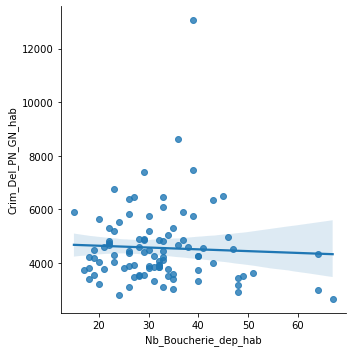

In [99]:
sns.lmplot(x="Nb_Boucherie_dep_hab", y='Crim_Del_PN_GN_hab', data=donnees_2018_hab_mini)

# 5) Analyse bivariée 

In [ ]:
sns.pairplot(donnees_2018_hab_mini[['TP6018','MED18', 'RD18', 'T1_2018', 'Nb_Boucherie_dep_hab', 'Nb_PN_GN_dep_100k_hab', 'Crim_Del_PN_GN_hab']], fit_reg = True)

# 6) Analyse multivariée

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(donnees_2018_hab_mini.corr(), dtype=np.bool))
heatmap = sns.heatmap(donnees_2018_hab_mini.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')